In [2]:
import pandas as pd
import os
import glob

os.chdir(r'\\데이터스토어\대구빅데이터활용센터\2.관광\2-4. 대구관광리뷰데이터')
dir_in='.'
file_list = os.listdir(dir_in)

file_list = [f for f in file_list]

df_google = pd.read_csv(file_list[0])
df_google.head()

,NAME,ADDRESS,LATITUDE,LONGITUDE,STAR_AVARAGE,STAR_1,STAR_2,STAR_3,STAR_4,STAR_5,TOTAL_COUNT,REVIEW_STAR,WRITE_STAR,REVIEW
0,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,1달 전,"가수 故김광석 님이 재조명되며 시민들이 참여해 만들어진 공간, 교훈도 즐거움도 의미..."
1,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,2주 전,대구 방문했다가 시간이 남길래 우연히 방문했어요.\n지하철로도 갈수있지만 10분정도...
2,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",4.0,4주 전,대구 가시면 한번은 가심이 좋을듯\n합니다. 김광석 그분의 음악사랑을\n거리의 풍...
3,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,3주 전,김광석길이야기만 듣고 실제 와서보니 주차장에서 내리면 바로라서 편리하고 볼꺼리도 많...
4,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,3주 전,근처에 볼일이 있어서 갔다가 잠시 들러봤는데요\n밤에 가면 더 이쁠것 같애요\n공용...


In [1]:
import pandas as pd
df_google = pd.read_csv('D:/jupiter_workspace/intern/dip_intern/sincheon/rawdata/31. 대구관광리뷰데이터/구글_대구관광_리뷰데이터(utf-8).csv')
df_google.head()

,NAME,ADDRESS,LATITUDE,LONGITUDE,STAR_AVARAGE,STAR_1,STAR_2,STAR_3,STAR_4,STAR_5,TOTAL_COUNT,REVIEW_STAR,WRITE_STAR,REVIEW
0,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,1달 전,"가수 故김광석 님이 재조명되며 시민들이 참여해 만들어진 공간, 교훈도 즐거움도 의미..."
1,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,2주 전,대구 방문했다가 시간이 남길래 우연히 방문했어요.\n지하철로도 갈수있지만 10분정도...
2,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",4.0,4주 전,대구 가시면 한번은 가심이 좋을듯\n합니다. 김광석 그분의 음악사랑을\n거리의 풍...
3,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,3주 전,김광석길이야기만 듣고 실제 와서보니 주차장에서 내리면 바로라서 편리하고 볼꺼리도 많...
4,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,4.2,205,213,"1,037","2,048","3,106","6,609",5.0,3주 전,근처에 볼일이 있어서 갔다가 잠시 들러봤는데요\n밤에 가면 더 이쁠것 같애요\n공용...


In [2]:
df_google.nunique()

NAME              109
ADDRESS           106
LATITUDE          108
LONGITUDE         108
STAR_AVARAGE       16
STAR_1             49
STAR_2             44
STAR_3             72
STAR_4             83
STAR_5             88
TOTAL_COUNT        95
REVIEW_STAR        14
WRITE_STAR         47
REVIEW          27224
dtype: int64

In [3]:
df_google.shape

(42293, 14)

# 사라진 리뷰데이터를 찾아서

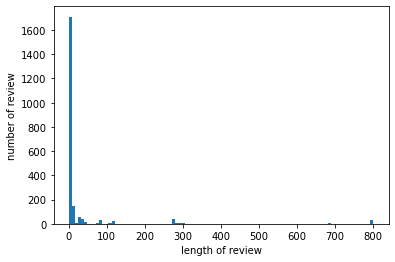

In [4]:
t = df_google.groupby('REVIEW').count()  #중복 리뷰 하나로 묶기
t = t[t['NAME'] >1].reset_index()  #중복 데이터만 가져옴

#중복리뷰를 중복횟수만큼 중복시켜서 리스트로 반환
def getDupReview(row) :
    review = row['REVIEW']  #중복리뷰
    num = row['NAME']  #중복횟수
    return [review]*num

tt=[]
#t.apply(lambda row : tt += getDupReview(row))

for i in range(t.shape[0]) : 
    review = t.loc[i, 'REVIEW']
    num = t.loc[i, 'NAME']
    tt = tt + [review]*num
    
import matplotlib.pyplot as plt

plt.hist([len(review) for review in tt], bins=100)
plt.xlabel('length of review')
plt.ylabel('number of review')
plt.show()

In [5]:
def ttt(maxlen, datalist) :
    count=0
    for data in datalist :
        if (len(data) <= maxlen) :
            count=count+1
    print('%s 글자 이하인 리뷰의 비율: %s'%(maxlen, count/len(datalist)*100))
    
maxlen=10
ttt(maxlen, tt)

10 글자 이하인 리뷰의 비율: 84.70533208606173


리뷰데이터 42293 = unique 27224 + null 13352 + duplication 1717  
중복데이터 중 84.7%(1454개) 가 10글자 미만임  
살릴까말까 >> 일단살림

# 데이터 정규화

In [6]:
#관광지 df
gSight = df_google[['NAME', 'ADDRESS', 'LATITUDE', 'LONGITUDE']].drop_duplicates().reset_index(drop=True)
gSight

,NAME,ADDRESS,LATITUDE,LONGITUDE
0,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596
1,두류공원,대구광역시 달서구 성당동 154,35.847243,128.557783
2,곳,대구광역시 동구 지묘동 85-1번지,35.944984,128.646518
3,대구수목원,대구광역시 달서구 대곡동 화암로 342,35.798938,128.523687
4,83타워,대구광역시 달서구 두류동 두류공원로 200,35.853304,128.566567
...,...,...,...,...
104,청도읍성,경상북도 청도군 화양읍 동상리,35.650159,128.707135
105,성밖숲,경상북도 성주군 성주읍 경산리 367-2,35.916008,128.279307
106,당항포관광지,경상남도 고성군 회화면 당항리 57 KR,35.056531,128.398413
107,무봉사,경상남도 밀양시 내일동 37,35.491651,128.756274


In [7]:
#관광지 별 평점 df
gStar = df_google[['NAME', 'STAR_AVARAGE', 'STAR_1','STAR_2', 'STAR_3', 'STAR_4', 'STAR_5', 'TOTAL_COUNT']].drop_duplicates().reset_index(drop=True)
gStar

,NAME,STAR_AVARAGE,STAR_1,STAR_2,STAR_3,STAR_4,STAR_5,TOTAL_COUNT
0,김광석 다시 그리기 길,4.2,205,213,"1,037","2,048","3,106","6,609"
1,두류공원,4.4,16,9,33,102,239,399
2,곳,4.5,0,0,2,5,10,17
3,대구수목원,4.5,46,32,124,626,"1,679","2,507"
4,83타워,4.4,111,71,383,"1,050","2,168","3,783"
...,...,...,...,...,...,...,...,...
104,청도읍성,4.2,33,25,130,301,424,913
105,성밖숲,4.3,34,32,141,393,629,"1,229"
106,당항포관광지,4.2,12,6,34,89,128,269
107,무봉사,4.1,0,2,5,15,13,35


In [8]:
#리뷰 df
gReview = df_google[['NAME', 'REVIEW_STAR', 'WRITE_STAR', 'REVIEW']].dropna().reset_index(drop=True)
gReview

,NAME,REVIEW_STAR,WRITE_STAR,REVIEW
0,김광석 다시 그리기 길,5.0,1달 전,"가수 故김광석 님이 재조명되며 시민들이 참여해 만들어진 공간, 교훈도 즐거움도 의미..."
1,김광석 다시 그리기 길,5.0,2주 전,대구 방문했다가 시간이 남길래 우연히 방문했어요.\n지하철로도 갈수있지만 10분정도...
2,김광석 다시 그리기 길,4.0,4주 전,대구 가시면 한번은 가심이 좋을듯\n합니다. 김광석 그분의 음악사랑을\n거리의 풍...
3,김광석 다시 그리기 길,5.0,3주 전,김광석길이야기만 듣고 실제 와서보니 주차장에서 내리면 바로라서 편리하고 볼꺼리도 많...
4,김광석 다시 그리기 길,5.0,3주 전,근처에 볼일이 있어서 갔다가 잠시 들러봤는데요\n밤에 가면 더 이쁠것 같애요\n공용...
...,...,...,...,...
28936,경천대,4.0,2년 전,멋지다
28937,경천대,4.0,2년 전,힐링하기 좋아요
28938,경천대,5.0,1년 전,(Google 번역 제공) 근처에 큰 강이 흐르므로 주변보다 시원한 여름을 즐길 수...
28939,경천대,4.0,2년 전,(Google 번역 제공) 짧은 하이킹과 산의 경치를 찾고 있다면 좋습니다. 큰 문...


# 신천 영향권 안에 있는 관광지만 데려오기

In [1]:
import os
#os.chdir(r'C:\Users\빅데이터활용센터\Desktop\신천')
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
import pandas as pd
from fiona.crs import from_string
from shapely.geometry import MultiPoint

In [21]:
#신천 영향권 데이터 gdf로 만들기
L_name=['node5', 'node10', 'node15', 'node20', 'node25']
L_time = [5, 10, 15, 20, 25]

final_df = pd.DataFrame()

for i in range(5) :
    
    name=L_name[i]
    df_name = './node_csv/' + name + '_4326.csv'
    df = pd.read_csv(df_name)
    df = gpd.GeoDataFrame(df)

    df['lon'] = df['lon'].astype(float)
    df['lat'] = df['lat'].astype(float)
    
    df['geometry'] = df.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
    df = gpd.GeoDataFrame(df[['osmid', 'color', 'street_cou', 'geometry']], geometry='geometry', crs = 'epsg:4326')
    
    #추출된 df의 점들로 폴리곤 생성, 경계값만 가져와서 저장
    poly = Polygon(Polygon(MultiPoint([[p.x, p.y] for p in df.geometry]).convex_hull).exterior)
    
    #특정 색상값이 나타내는 시간
    time = L_time[i]
    
    #전체 통합
    final_df = final_df.append(pd.DataFrame([name, time, poly]).T, ignore_index=True)
    

final_df.columns=['name', 'time', 'geometry']
final_gdf = gpd.GeoDataFrame(final_df, geometry='geometry', crs='epsg:4326')
final_gdf

c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19996\1626870515.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([name, time, poly]).T, ignore_index=True)
c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19996\1626870515.py:27: FutureWarning: The frame.append method is deprecated and will

,name,time,geometry
0,node5,5,"POLYGON ((128.62498 35.80213, 128.62228 35.802..."
1,node10,10,"POLYGON ((128.62248 35.80107, 128.60983 35.809..."
2,node15,15,"POLYGON ((128.62488 35.79781, 128.62369 35.798..."
3,node20,20,"POLYGON ((128.62801 35.79490, 128.60568 35.805..."
4,node25,25,"POLYGON ((128.62859 35.79305, 128.60153 35.810..."


In [11]:
#관광지 데이터 gdf로 만들기
gSight['geometry'] = gSight.apply(lambda row : Point([row['LONGITUDE'], row['LATITUDE']]), axis=1)
gdfSight = gpd.GeoDataFrame(gSight, geometry='geometry', crs='epsg:4326')
gdfSight

c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,NAME,ADDRESS,LATITUDE,LONGITUDE,geometry
0,김광석 다시 그리기 길,대구광역시 중구 대봉동,35.859905,128.606596,POINT (128.60660 35.85990)
1,두류공원,대구광역시 달서구 성당동 154,35.847243,128.557783,POINT (128.55778 35.84724)
2,곳,대구광역시 동구 지묘동 85-1번지,35.944984,128.646518,POINT (128.64652 35.94498)
3,대구수목원,대구광역시 달서구 대곡동 화암로 342,35.798938,128.523687,POINT (128.52369 35.79894)
4,83타워,대구광역시 달서구 두류동 두류공원로 200,35.853304,128.566567,POINT (128.56657 35.85330)
...,...,...,...,...,...
104,청도읍성,경상북도 청도군 화양읍 동상리,35.650159,128.707135,POINT (128.70714 35.65016)
105,성밖숲,경상북도 성주군 성주읍 경산리 367-2,35.916008,128.279307,POINT (128.27931 35.91601)
106,당항포관광지,경상남도 고성군 회화면 당항리 57 KR,35.056531,128.398413,POINT (128.39841 35.05653)
107,무봉사,경상남도 밀양시 내일동 37,35.491651,128.756274,POINT (128.75627 35.49165)


In [22]:
final_gdf['unique_geometry'] = ''

for i in range(5) :
    bigPoly = final_gdf.loc[i, 'geometry']

    if i == 0 :
        poly = bigPoly
        final_gdf.at[i, 'unique_geometry'] = poly   #5분거리 폴리곤은 그대로 두고
    else :
        smallPoly = final_gdf.loc[i-1, 'geometry']
        poly = bigPoly.difference(smallPoly)
        final_gdf.at[i, 'unique_geometry'] = poly   #그 이상의 폴리곤은 큰거-작은거 해서 유니크하게 만들기


final_gdf = gpd.GeoDataFrame(final_gdf, geometry='unique_geometry', crs='epsg:4326')
final_gdf

,name,time,geometry,unique_geometry
0,node5,5,"POLYGON ((128.62498 35.80213, 128.62228 35.802...","POLYGON ((128.62498 35.80213, 128.62228 35.802..."
1,node10,10,"POLYGON ((128.62248 35.80107, 128.60983 35.809...","POLYGON ((128.60983 35.80985, 128.60067 35.832..."
2,node15,15,"POLYGON ((128.62488 35.79781, 128.62369 35.798...","MULTIPOLYGON (((128.62369 35.79867, 128.61659 ..."
3,node20,20,"POLYGON ((128.62801 35.79490, 128.60568 35.805...","POLYGON ((128.60568 35.80531, 128.60564 35.805..."
4,node25,25,"POLYGON ((128.62859 35.79305, 128.60153 35.810...","MULTIPOLYGON (((128.61898 35.79911, 128.62801 ..."


In [24]:
#폴리곤 안에 있는 관광지만 추출
scSight = gpd.sjoin(final_gdf, gdfSight)
scSight = scSight[['NAME', 'time', 'ADDRESS']].reset_index(drop=True)
scSight

,NAME,time,ADDRESS
0,고산골 공룡공원,5,대구광역시 남구 봉덕2동 1586-4
1,건들바위가든,5,대구광역시 중구 대봉2동 732-2
2,건들바위,5,대구광역시 중구 대봉2동 733-18 -dong、
3,건들바위(대구입암),5,대구광역시 중구 대봉동 735-28
4,김광석 다시 그리기 길,5,대구광역시 중구 대봉동
5,방천시장,5,대구광역시 중구 대봉1동 달구벌대로446길 2
6,봉산문화거리,5,대구광역시 중구 봉산동 봉산문화2길
7,봉산문화회관,5,대구광역시 중구 봉산동 봉산문화길 77
8,하늘호수,5,대구광역시 중구 삼덕동1가 공평로 3
9,달구벌대종,5,대구광역시 중구 동인동2가 42


In [31]:
#신천 영향권 내의 관광지 리스트
L_sight = scSight.NAME.tolist()

#신천 영향권 관광지 평균 평점 
scStar = gStar[gStar['NAME'].isin(L_sight)]
scStar


,NAME,STAR_AVARAGE,STAR_1,STAR_2,STAR_3,STAR_4,STAR_5,TOTAL_COUNT
0,김광석 다시 그리기 길,4.2,205,213,"1,037","2,048","3,106","6,609"
5,경상감영공원,3.9,60,53,276,406,465,"1,260"
11,천주교 대구대교구 주교좌 계산대성당,4.5,30,15,144,435,995,"1,619"
14,약령시 한의약 박물관,4.1,19,27,168,298,345,857
19,대구근대역사관,4.3,9,9,63,151,219,451
23,방천시장,4.0,34,30,161,256,298,779
24,대구예술발전소,4.2,25,26,145,234,394,824
30,청라언덕,4.3,13,15,96,262,450,836
34,건들바위,4.3,0,1,1,1,6,9
35,이상화 고택,4.2,9,12,70,107,185,383


In [37]:
scReview = gReview[gReview['NAME'].isin(L_sight)]
#scReview.groupby('NAME').count().sort_values('REVIEW', ascending=False)
scReview

,NAME,REVIEW_STAR,WRITE_STAR,REVIEW
0,김광석 다시 그리기 길,5.0,1달 전,"가수 故김광석 님이 재조명되며 시민들이 참여해 만들어진 공간, 교훈도 즐거움도 의미..."
1,김광석 다시 그리기 길,5.0,2주 전,대구 방문했다가 시간이 남길래 우연히 방문했어요.\n지하철로도 갈수있지만 10분정도...
2,김광석 다시 그리기 길,4.0,4주 전,대구 가시면 한번은 가심이 좋을듯\n합니다. 김광석 그분의 음악사랑을\n거리의 풍...
3,김광석 다시 그리기 길,5.0,3주 전,김광석길이야기만 듣고 실제 와서보니 주차장에서 내리면 바로라서 편리하고 볼꺼리도 많...
4,김광석 다시 그리기 길,5.0,3주 전,근처에 볼일이 있어서 갔다가 잠시 들러봤는데요\n밤에 가면 더 이쁠것 같애요\n공용...
...,...,...,...,...
27050,노보텔 앰배서더 대구,5.0,1년 전,"고객님께,\n\nNovotel Ambassador Daegu 후기를 남겨주셔서 대단..."
27051,노보텔 앰배서더 대구,5.0,1년 전,"고객님께,\n\n저희 호텔에 대해 좋은 평가를 해주셔서 감사합니다. 머무시는 동안 ..."
27052,노보텔 앰배서더 대구,4.0,3년 전,"(Google 번역 제공) 친애하는 손님,\n\n노보텔 앰배서더 대구에서의 숙박에 ..."
27053,노보텔 앰배서더 대구,3.0,1년 전,"고객님께,\n\nNovotel Ambassador Daegud 이용후기를 남겨주셔서..."


# 시계열성 토픽모델링

구글: 날짜정보없음, 네이버: 관광지명이 id, 트립어드바이저: 위경도없음

In [33]:
from konlpy.tag import Okt
okt = Okt()
msg = "대구 방문했다가 시간이 남길래 우연히 방문했어요."
print(okt.pos(msg))

[('대구', 'Noun'), ('방문', 'Noun'), ('했다가', 'Verb'), ('시간', 'Noun'), ('이', 'Josa'), ('남길래', 'Verb'), ('우연히', 'Adverb'), ('방문', 'Noun'), ('했어요', 'Verb'), ('.', 'Punctuation')]


# 네이버

In [2]:
import pandas as pd
df_naver = pd.read_csv('D:/jupiter_workspace/intern/dip_intern/sincheon/rawdata/31. 대구관광리뷰데이터/네이버_대구관광_장소데이터(utf-8).csv')
df_naver.head()

,Unnamed: 0,ID,NAME,CATEGORY,ADDRESS_2,ADDRESS_1,LNG,LAT,REVIEW_COUNT,STAR_MEAN
0,0,1710520111,호텔리베,호텔,태평로2가 1-51,대구 중구 태평로2가,128.592952,35.875725,14,3.93
1,1,36139603,젠모텔,모텔,태평로2가 37-7,대구 중구 태평로2가,128.593098,35.875990,24,3.63
2,2,15970709,사보이 호텔,모텔,대안동 80-1 대구 동성로 사보이호텔,대구 중구 대안동,128.591106,35.872625,17,3.68
3,3,11622388,경상감영공원,테마공원,포정동 21,대구 중구 포정동,128.592229,35.872176,10,3.95
4,4,917513103,더한옥,전통숙소,북내동 4-1,대구 중구 북내동,128.590150,35.873083,53,3.49


In [4]:
df_naver2 = pd.read_csv('D:/jupiter_workspace/intern/dip_intern/sincheon/rawdata/31. 대구관광리뷰데이터/네이버_대구관광_리뷰데이터(utf-8).csv')
df_naver2.head()

,Unnamed: 0,ID,STAR,REVIEW,N_VISIT,WRITE_DATE
0,0,1996982038,5.0,서울에서 내려오는 지인을 위해 예약했는데 같은지역의주민인 내가 가보니 찾기도 쉽고 ...,1번째 방문,2019.07.23
1,1,1996982038,4.0,저렴하게 잘 이용하고 왔습니다. 객실 깔끔하고 주택가에 위치해있어서 참 조용하니 좋...,1번째 방문,2018.03.02
2,2,1996982038,4.0,"사장님도 친절하시고, 편안하게 쉴 수 있었습니다.",1번째 방문,2021.05.07
3,3,1996982038,0.5,청소상태 너무 엉망이예요 걸을때마다 양말에 붙어니던 머리카락 덩어리하며 침대밑에 굴...,1번째 방문,2020.10.01
4,4,1996982038,5.0,깔끔한 숙소입니다. 잘 묵고 갑니다,1번째 방문,2020.07.05


In [5]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely.geometry import MultiPoint

In [6]:
#신천 영향권 데이터 gdf로 만들기
L_name=['node5', 'node10', 'node15', 'node20', 'node25']
L_time = [5, 10, 15, 20, 25]

final_df = pd.DataFrame()

for i in range(5) :
    
    name=L_name[i]
    df_name = './node_csv/' + name + '_4326.csv'
    df = pd.read_csv(df_name)
    df = gpd.GeoDataFrame(df)

    df['lon'] = df['lon'].astype(float)
    df['lat'] = df['lat'].astype(float)
    
    df['geometry'] = df.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
    df = gpd.GeoDataFrame(df[['osmid', 'color', 'street_cou', 'geometry']], geometry='geometry', crs = 'epsg:4326')
    
    #추출된 df의 점들로 폴리곤 생성, 경계값만 가져와서 저장
    poly = Polygon(Polygon(MultiPoint([[p.x, p.y] for p in df.geometry]).convex_hull).exterior)
    
    #특정 색상값이 나타내는 시간
    time = L_time[i]
    
    #전체 통합
    final_df = final_df.append(pd.DataFrame([name, time, poly]).T, ignore_index=True)
    

final_df.columns=['node_id', 'time', 'geometry']
final_gdf = gpd.GeoDataFrame(final_df, geometry='geometry', crs='epsg:4326')
final_gdf

c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5104\2154104161.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(pd.DataFrame([name, time, poly]).T, ignore_index=True)
c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5104\2154104161.py:27: FutureWarning: The frame.append method is deprecated and will b

,node_id,time,geometry
0,node5,5,"POLYGON ((128.62498 35.80213, 128.62228 35.802..."
1,node10,10,"POLYGON ((128.62248 35.80107, 128.60983 35.809..."
2,node15,15,"POLYGON ((128.62488 35.79781, 128.62369 35.798..."
3,node20,20,"POLYGON ((128.62801 35.79490, 128.60568 35.805..."
4,node25,25,"POLYGON ((128.62859 35.79305, 128.60153 35.810..."


In [7]:
final_gdf['unique_geometry'] = ''

for i in range(5) :
    bigPoly = final_gdf.loc[i, 'geometry']

    if i == 0 :
        poly = bigPoly
        final_gdf.at[i, 'unique_geometry'] = poly   #5분거리 폴리곤은 그대로 두고
    else :
        smallPoly = final_gdf.loc[i-1, 'geometry']
        poly = bigPoly.difference(smallPoly)
        final_gdf.at[i, 'unique_geometry'] = poly   #그 이상의 폴리곤은 큰거-작은거 해서 유니크하게 만들기


final_gdf = gpd.GeoDataFrame(final_gdf.drop(columns='geometry'), geometry='unique_geometry', crs='epsg:4326')
final_gdf

,node_id,time,unique_geometry
0,node5,5,"POLYGON ((128.62498 35.80213, 128.62228 35.802..."
1,node10,10,"POLYGON ((128.60983 35.80985, 128.60067 35.832..."
2,node15,15,"MULTIPOLYGON (((128.62369 35.79867, 128.61659 ..."
3,node20,20,"POLYGON ((128.60568 35.80531, 128.60564 35.805..."
4,node25,25,"MULTIPOLYGON (((128.61898 35.79911, 128.62801 ..."


In [8]:
#관광지 데이터 gdf로 만들기
df_naver['geometry'] = df_naver.apply(lambda row : Point([row['LNG'], row['LAT']]), axis=1)
gdf = gpd.GeoDataFrame(df_naver, geometry='geometry', crs='epsg:4326')

#폴리곤 안에 있는 관광지만 추출
scSight = gpd.sjoin(final_gdf, gdf)
scSight = scSight[['time', 'NAME', 'LNG', 'LAT']].reset_index(drop=True)

scSight

c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,time,NAME,LNG,LAT
0,5,호텔수성,128.619184,35.823794
1,5,올레모텔,128.623131,35.824715
2,5,아리아나호텔,128.622900,35.832808
3,5,엠투고모텔,128.621858,35.837578
4,5,폭스모텔,128.621588,35.838090
...,...,...,...,...
113,25,청라언덕 게스트하우스,128.583602,35.866450
114,25,허니문 모텔,128.581366,35.874947
115,25,시네마모텔,128.616199,35.895997
116,25,영모텔,128.615525,35.896499
